In [1]:
cnfl = [false]
include("PVCR.jl");

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1186
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1186
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(

## Residential Cases
The analysis of optimal adoption in residential cases uses a decision making model as follows: 
 - The adoption of PV shouldn't induce net economic losses within the 5 years, calculated as the simple sum of the first 60 bills. 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 0.0 since the expectation is to see saving over all the periods. 

In [3]:
consumption = 100:50:2500
pv_res = []
ice_residential.tariff = R_ICE
for (ix, co) in enumerate(consumption)
    ice_residential.econsumption = co; get_pmax(ice_residential);
    res = optimal_pv(ice_residential, PVRes, 0.0:0.5:15, BAC1, tariff_increase = true)
    push!(pv_res, res[1][2])
end

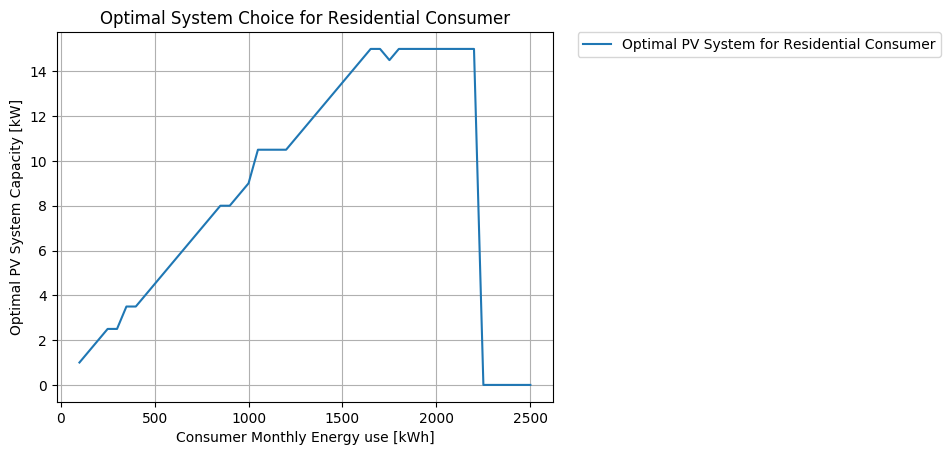

PyObject Text(0.5, 1, 'Optimal System Choice for Residential Consumer')

In [3]:
plot(consumption, pv_res, label = "Optimal PV System for Residential Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Residential Consumer")

## Commercial Industrial Cases
The analysis of optimal adoption in commercial-industrial cases uses a decision making model as follows: 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 6.0 % the same as the reference rate of risk free APY in colones

In [4]:
consumption1 = 500:50:3000
pv_comind = []
for (ix, co) in enumerate(consumption1)
    ice_commercial.econsumption = co; get_pmax(ice_commercial);
    res = optimal_pv(ice_commercial, PVComInd, 0.0:0.5:20, BAC1, tariff_increase = true)
    push!(pv_comind, res[1][2])
end

In [5]:
consumption2 = 3500:50:6000
for (ix, co) in enumerate(consumption2)
    ice_commercial.econsumption = co; get_pmax(ice_commercial);
    res = optimal_pv(ice_commercial, PVComInd, 0.0:1:40, BAC1, tariff_increase = true)
    push!(pv_comind, res[1][2])
end

In [6]:
consumption3 = 6100:100:10000
for (ix, co) in enumerate(consumption3)
    ice_commercial.econsumption = co; get_pmax(ice_commercial);
    res = optimal_pv(ice_commercial, PVComInd, 0.0:1:100, BAC1, tariff_increase = true)
    push!(pv_comind, res[1][2])
end

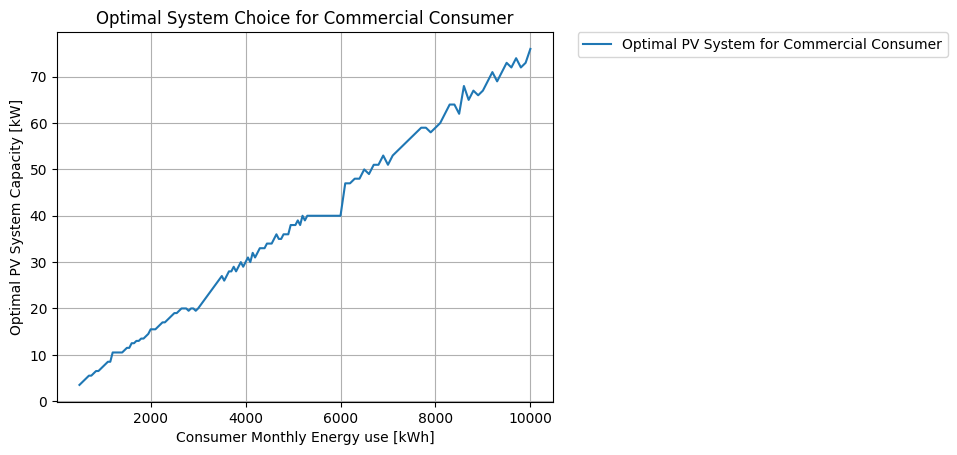

PyObject Text(0.5, 1, 'Optimal System Choice for Commercial Consumer')

In [7]:
plot(vcat(consumption1, consumption2, consumption3), pv_comind, label = "Optimal PV System for Commercial Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Commercial Consumer")

## Medium Voltage Cases
- Uses same criteria as in the Commercial - Industrial cases 

In [8]:
consumption = 10000:5000:100000
pv_tmt = []
for (ix, co) in enumerate(consumption)
     ice_mediumvoltage.econsumption = co; get_pmax(ice_mediumvoltage);
    res = optimal_pv(ice_mediumvoltage, PVTMT, 0:10.0:1000.0, BAC1, tariff_increase = true)
    push!(pv_tmt, res[1][2])
end

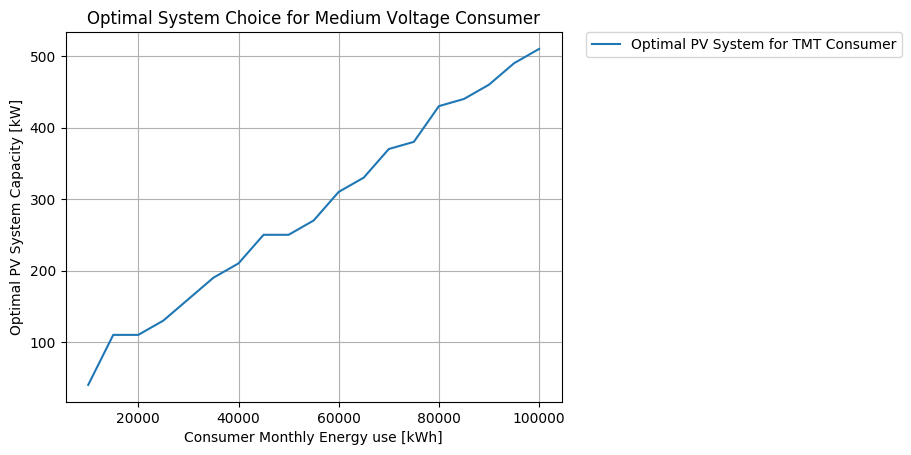

PyObject Text(0.5, 1, 'Optimal System Choice for Medium Voltage Consumer')

In [9]:
plot(consumption,pv_tmt, label = "Optimal PV System for TMT Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Medium Voltage Consumer")

# Alternative Rate Model

# Residential Cases
The analysis of optimal adoption in residential cases uses a decision making model as follows: 
 - The adoption of PV shouldn't induce net economic losses within the 5 years, calculated as the simple sum of the first 60 bills. 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 0.0 since the expectation is to see saving over all the periods. 

In [4]:
consumption = 100:50:2500
pv_alt_res = []
ice_residential.tariff = A_R_ICE
for (ix, co) in enumerate(consumption)
    ice_residential.econsumption = co; get_pmax(ice_residential);
    res = optimal_pv(ice_residential, PVRes, 0.0:0.5:15, BAC1, tariff_increase = true)
    push!(pv_alt_res, res[1][2])
end

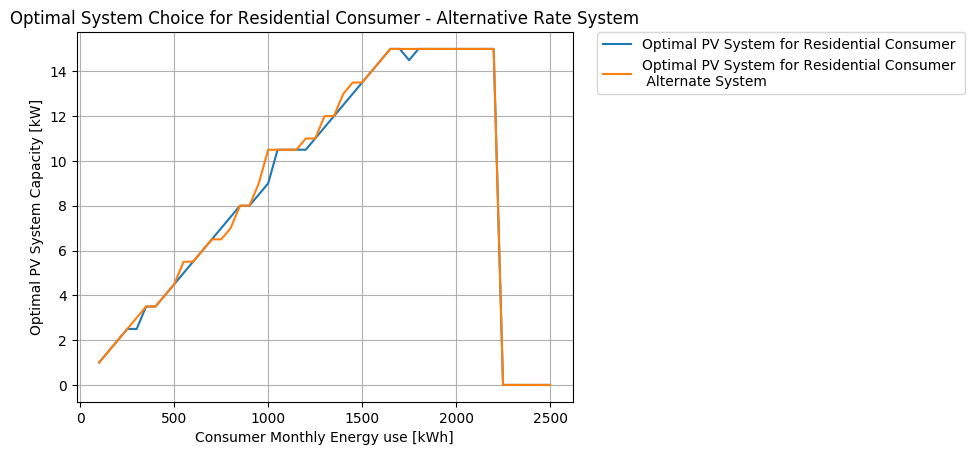

PyObject Text(0.5, 1, 'Optimal System Choice for Residential Consumer - Alternative Rate System')

In [5]:
plot(consumption, pv_res, label = "Optimal PV System for Residential Consumer")
plot(consumption,pv_alt_res, label = "Optimal PV System for Residential Consumer \n Alternate System")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Residential Consumer - Alternative Rate System")

# Commercial Industrial Cases
The analysis of optimal adoption in commercial-industrial cases uses a decision making model as follows: 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 6.0 % the same as the reference rate of risk free APY in colones

In [17]:
ice_commercial.tariff = A_CI_ICE
consumption1 = 500:50:3000
pv_alt_comind = []
for (ix, co) in enumerate(consumption1)
    ice_commercial.econsumption = co; get_pmax(ice_commercial);
    res = optimal_pv(ice_commercial, PVComInd, 0.0:0.5:20, BAC1, tariff_increase = true)
    push!(pv_alt_comind, res[1][2])
end

In [18]:
consumption2 = 3500:50:6000
for (ix, co) in enumerate(consumption2)
    ice_commercial.econsumption = co; get_pmax(ice_commercial);
    res = optimal_pv(ice_commercial, PVComInd, 0.0:1:40, BAC1, tariff_increase = true)
    push!(pv_alt_comind, res[1][2])
end

In [19]:
consumption3 = 6100:100:10000
for (ix, co) in enumerate(consumption3)
    ice_commercial.econsumption = co; get_pmax(ice_commercial);
    res = optimal_pv(ice_commercial, PVComInd, 0.0:1:100, BAC1, tariff_increase = true)
    push!(pv_alt_comind, res[1][2])
end

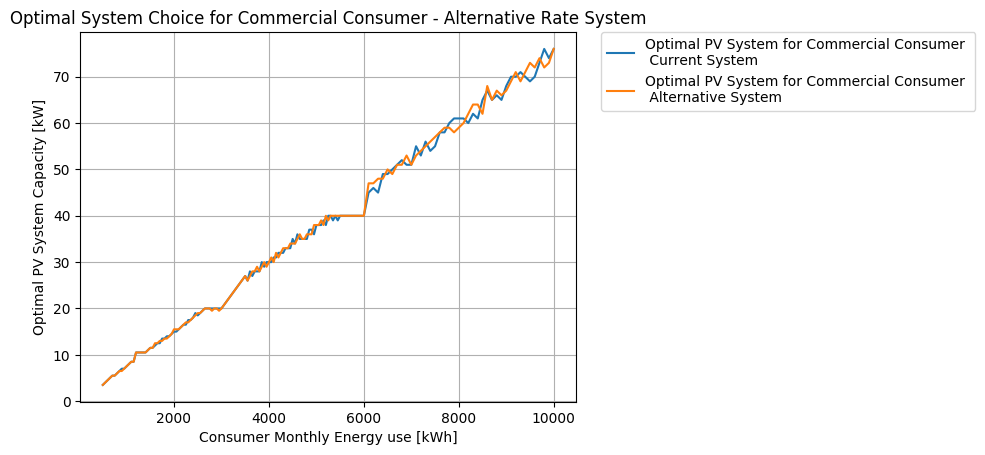

PyObject Text(0.5, 1, 'Optimal System Choice for Commercial Consumer - Alternative Rate System')

In [20]:
plot(vcat(consumption1, consumption2, consumption3),pv_alt_comind, label = "Optimal PV System for Commercial Consumer \n Current System")
plot(vcat(consumption1, consumption2, consumption3),pv_comind, label = "Optimal PV System for Commercial Consumer \n Alternative System")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Commercial Consumer - Alternative Rate System")

# Medium Voltage Cases
- Uses same criteria as in the Commercial - Industrial cases 

In [21]:
ice_mediumvoltage.tariff = A_TMT_ICE
consumption = 10000:5000:100000
pv_alt_tmt = []
for (ix, co) in enumerate(consumption)
     ice_mediumvoltage.econsumption = co; get_pmax(ice_mediumvoltage);
    res = optimal_pv(ice_mediumvoltage, PVTMT, 0:10.0:1000.0, BAC1, tariff_increase = true)
    push!(pv_alt_tmt, res[1][2])
end

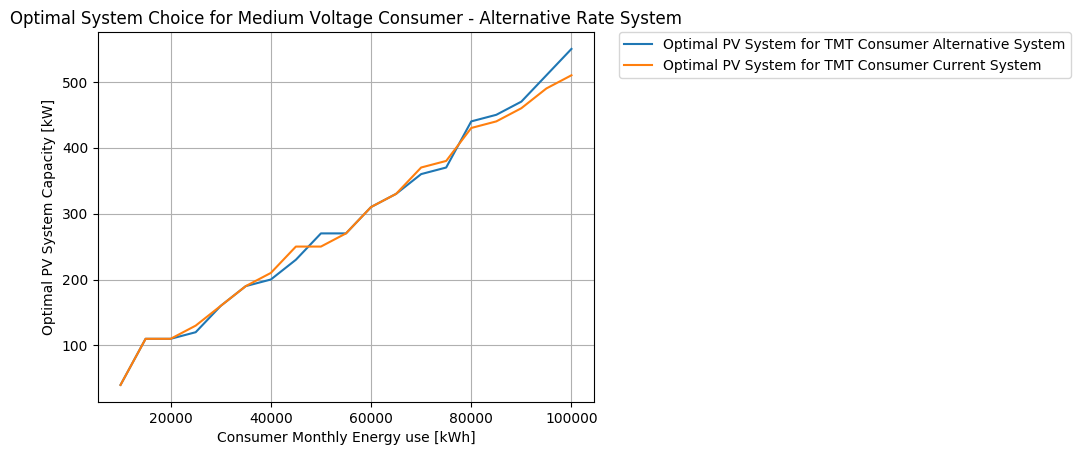

PyObject Text(0.5, 1, 'Optimal System Choice for Medium Voltage Consumer - Alternative Rate System')

In [22]:
plot(consumption, pv_alt_tmt, label = "Optimal PV System for TMT Consumer Alternative System")
plot(consumption, pv_tmt, label = "Optimal PV System for TMT Consumer Current System")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Medium Voltage Consumer - Alternative Rate System")

# Monte Carlo Residential
- For each of the sample locations in the ICE service territory, we have a corresponding output from a theoretical 1kW system placed there. For each such data point, determine the optimal PV system installation at that location

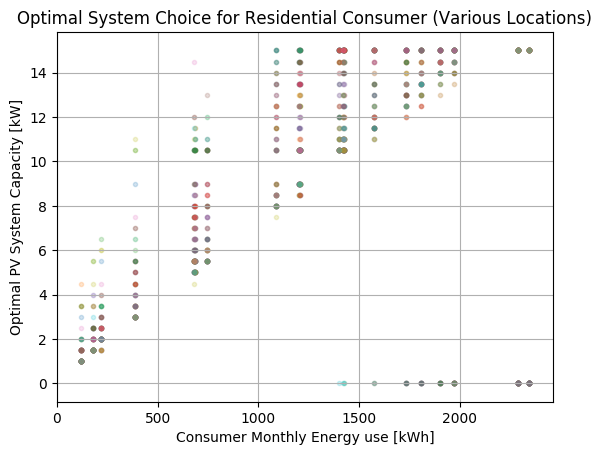

PyObject Text(0.5, 1, 'Optimal System Choice for Residential Consumer (Various Locations)')

In [6]:
using PyPlot
using DelimitedFiles
# pyplot()
fig = plt.figure() #plot(rand(10))#
random_res_consumption = rand(100:2500,20)# Random subset of consumption values 100:50:2500

mc_filename = string("data/monte_carlo_data/ICE_100.txt")
if isfile(mc_filename)
    mc_pv_output = readdlm(mc_filename, '\t', Float64, '\n')
else
    println("Can't find NSRDB+SAM output")
    return
end

for pv_output in eachcol(mc_pv_output)
    mcPVRes = newPVRes(pv_output)
    new_axis = fig.add_subplot(111)
    pv_res = []
    for (ix, co) in enumerate(random_res_consumption)
        ice_residential.econsumption = co; get_pmax(ice_residential);
        res = optimal_pv(ice_residential, mcPVRes, 0.0:0.5:15, BAC1, tariff_increase = true)
        push!(pv_res, res[1][2])
    end
    new_axis.scatter(random_res_consumption, pv_res, marker=".", alpha=0.2)
end

ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Residential Consumer (Various Locations)")

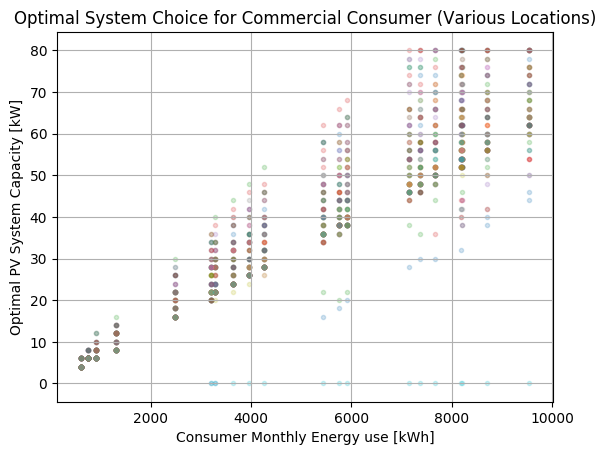

PyObject Text(0.5, 1, 'Optimal System Choice for Commercial Consumer (Various Locations)')

In [5]:
fig = plt.figure() #plot(rand(10))#
random_comind_consumption = rand(500:10000,20)# Random subset of commercial values

mc_filename = string("data/monte_carlo_data/ICE_100.txt")
if isfile(mc_filename)
    mc_pv_output = readdlm(mc_filename, '\t', Float64, '\n')
else
    println("Can't find NSRDB+SAM output")
    return
end

for pv_output in eachcol(mc_pv_output)
    mcPVComInd = newPVComInd(pv_output)
    new_axis = fig.add_subplot(111)
    pv_comInd = []
    for (ix, co) in enumerate(random_comind_consumption)
        ice_commercial.econsumption = co; get_pmax(ice_commercial);
        comInd = optimal_pv(ice_commercial, mcPVComInd, 0.0:2:80, BAC1, tariff_increase = true)
        push!(pv_comInd, comInd[1][2])
    end
    new_axis.scatter(random_comind_consumption, pv_comInd, marker=".", alpha=0.2)
end

ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Commercial Consumer (Various Locations)")

In [2]:
ice_residential.tariff = R_ICE
res_consumption_for_mc = rand(100:2500,20)
res_mc_data = retrieve_monte_carlo_model_prediction("ICE", 100, "R", ice_residential, res_consumption_for_mc, 0.0:0.5:15)

100-element Array{Any,1}:
 Any[4.5, 6.5, 15.0, 15.0, 11.5, 15.0, 0.0, 2.5, 15.0, 0.0, 0.0, 0.0, 15.0, 15.0, 11.0, 0.0, 11.5, 1.5, 14.5, 1.5]    
 Any[3.5, 4.5, 12.0, 12.0, 8.0, 13.0, 15.0, 2.0, 14.0, 15.0, 15.0, 15.0, 12.5, 11.0, 8.0, 15.0, 8.0, 1.0, 10.5, 1.0]  
 Any[5.5, 7.5, 0.0, 0.0, 14.0, 0.0, 0.0, 3.5, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 13.5, 0.0, 14.0, 2.0, 15.0, 1.5]         
 Any[2.5, 4.0, 10.5, 11.0, 7.0, 11.5, 14.0, 1.5, 12.0, 13.0, 13.0, 13.5, 10.5, 9.0, 7.0, 15.0, 7.0, 1.0, 9.0, 1.0]    
 Any[4.0, 5.5, 14.0, 14.5, 10.5, 15.0, 0.0, 2.5, 15.0, 15.0, 15.0, 15.0, 14.5, 12.5, 9.0, 0.0, 10.5, 1.5, 13.0, 1.5]  
 Any[6.0, 9.0, 15.0, 14.0, 10.5, 15.0, 0.0, 3.5, 15.0, 15.0, 15.0, 0.0, 14.5, 13.5, 13.5, 0.0, 13.5, 2.0, 13.5, 2.0]  
 Any[3.0, 4.0, 11.0, 11.0, 7.5, 12.0, 15.0, 2.0, 13.0, 13.5, 14.0, 14.5, 11.5, 10.5, 7.0, 15.0, 7.5, 1.0, 10.5, 1.0]  
 Any[3.5, 5.0, 13.5, 13.5, 8.5, 14.5, 15.0, 2.0, 15.0, 15.0, 15.0, 15.0, 13.5, 12.0, 8.5, 0.0, 9.0, 1.0, 11.5, 1.0]   
 Any[4.0, 6.0, 15.0, 1

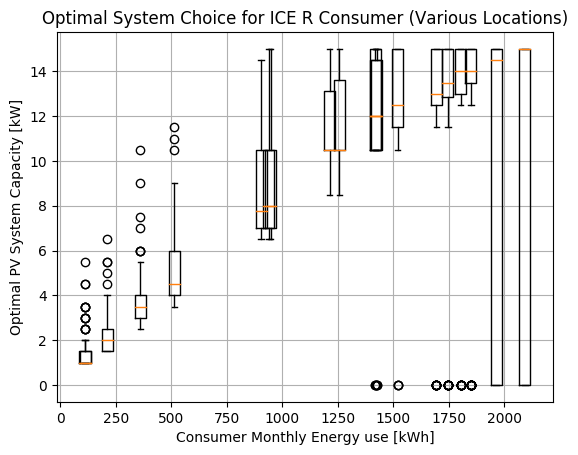

PyObject Text(0.5, 1, 'Optimal System Choice for ICE R Consumer (Various Locations)')

In [3]:
plot_monte_carlo_model_prediction("ICE", "R", res_consumption_for_mc, res_mc_data)

In [4]:
ice_commercial.tariff = CI_ICE
ci_consumption_for_mc = rand(500:10000,20)
ci_mc_data = retrieve_monte_carlo_model_prediction("ICE", 100, "CI", ice_commercial, ci_consumption_for_mc, 0.0:1:100)

100-element Array{Any,1}:
 Any[59.0, 67.0, 45.0, 15.0, 26.0, 78.0, 44.0, 64.0, 38.0, 84.0, 83.0, 94.0, 15.0, 96.0, 88.0, 34.0, 79.0, 16.0, 47.0, 95.0] 
 Any[41.0, 47.0, 31.0, 11.0, 18.0, 56.0, 32.0, 45.0, 26.0, 60.0, 58.0, 63.0, 11.0, 67.0, 59.0, 23.0, 57.0, 12.0, 33.0, 69.0] 
 Any[27.0, 30.0, 54.0, 18.0, 31.0, 41.0, 14.0, 30.0, 47.0, 42.0, 45.0, 56.0, 18.0, 54.0, 44.0, 39.0, 46.0, 20.0, 16.0, 42.0] 
 Any[38.0, 44.0, 29.0, 11.0, 17.0, 50.0, 29.0, 40.0, 25.0, 55.0, 53.0, 62.0, 11.0, 62.0, 55.0, 22.0, 51.0, 11.0, 30.0, 62.0] 
 Any[51.0, 60.0, 39.0, 13.0, 23.0, 69.0, 39.0, 56.0, 34.0, 76.0, 72.0, 83.0, 13.0, 83.0, 77.0, 29.0, 69.0, 14.0, 41.0, 84.0] 
 Any[52.0, 61.0, 40.0, 14.0, 24.0, 73.0, 43.0, 56.0, 36.0, 73.0, 74.0, 83.0, 14.0, 88.0, 77.0, 31.0, 72.0, 15.0, 43.0, 84.0] 
 Any[41.0, 47.0, 31.0, 11.0, 18.0, 54.0, 31.0, 44.0, 27.0, 58.0, 57.0, 65.0, 11.0, 67.0, 60.0, 23.0, 55.0, 11.0, 33.0, 67.0] 
 Any[48.0, 55.0, 37.0, 13.0, 22.0, 65.0, 37.0, 52.0, 32.0, 70.0, 68.0, 76.0, 12.0, 80.0, 71.

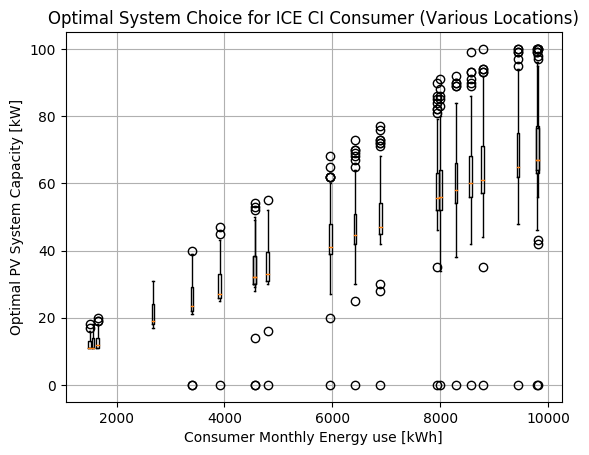

PyObject Text(0.5, 1, 'Optimal System Choice for ICE CI Consumer (Various Locations)')

In [5]:
plot_monte_carlo_model_prediction("ICE", "CI", ci_consumption_for_mc, ci_mc_data)

In [6]:
ice_mediumvoltage.tariff = TMT_ICE
tmt_consumption_for_mc = rand(10000:100000,20)
tmt_mc_data = retrieve_monte_carlo_model_prediction("ICE", 100, "TMT", ice_mediumvoltage, tmt_consumption_for_mc, 0.0:10:1000)

100-element Array{Any,1}:
 Any[110.0, 270.0, 410.0, 360.0, 20.0, 110.0, 380.0, 450.0, 360.0, 110.0, 370.0, 340.0, 170.0, 290.0, 340.0, 370.0, 420.0, 160.0, 310.0, 360.0] 
 Any[110.0, 270.0, 470.0, 370.0, 110.0, 110.0, 380.0, 430.0, 360.0, 110.0, 420.0, 410.0, 160.0, 280.0, 340.0, 410.0, 480.0, 150.0, 290.0, 350.0]
 Any[110.0, 150.0, 180.0, 130.0, 20.0, 110.0, 150.0, 190.0, 130.0, 110.0, 170.0, 170.0, 120.0, 110.0, 140.0, 180.0, 190.0, 120.0, 110.0, 150.0] 
 Any[110.0, 260.0, 470.0, 330.0, 50.0, 110.0, 360.0, 430.0, 350.0, 110.0, 380.0, 380.0, 150.0, 250.0, 330.0, 380.0, 470.0, 140.0, 280.0, 350.0] 
 Any[110.0, 300.0, 530.0, 410.0, 110.0, 130.0, 410.0, 490.0, 430.0, 110.0, 490.0, 430.0, 180.0, 300.0, 380.0, 500.0, 570.0, 180.0, 330.0, 410.0]
 Any[110.0, 310.0, 530.0, 420.0, 20.0, 130.0, 410.0, 480.0, 380.0, 110.0, 480.0, 430.0, 180.0, 320.0, 340.0, 460.0, 500.0, 170.0, 320.0, 400.0] 
 Any[110.0, 270.0, 490.0, 370.0, 110.0, 110.0, 390.0, 440.0, 360.0, 110.0, 420.0, 400.0, 170.0, 270.0, 3

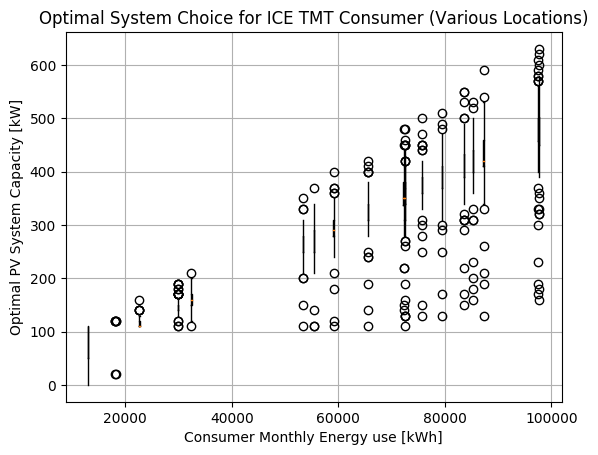

PyObject Text(0.5, 1, 'Optimal System Choice for ICE TMT Consumer (Various Locations)')

In [7]:
plot_monte_carlo_model_prediction("ICE", "TMT", tmt_consumption_for_mc, tmt_mc_data)

In [8]:
open("data/monte_carlo_data/ICE_RES_MODEL_CONSUMPTIONS.txt", "w") do io
   writedlm(io, res_consumption_for_mc)
end
open("data/monte_carlo_data/ICE_RES_MODEL_PREDICTIONS.txt", "w") do io
   writedlm(io, res_mc_data)
end
open("data/monte_carlo_data/ICE_CI_MODEL_CONSUMPTIONS.txt", "w") do io
   writedlm(io, ci_consumption_for_mc)
end
open("data/monte_carlo_data/ICE_CI_MODEL_PREDICTIONS.txt", "w") do io
   writedlm(io, ci_mc_data)
end
open("data/monte_carlo_data/ICE_TMT_MODEL_CONSUMPTIONS.txt", "w") do io
   writedlm(io, tmt_consumption_for_mc)
end
open("data/monte_carlo_data/ICE_TMT_MODEL_PREDICTIONS.txt", "w") do io
   writedlm(io, tmt_mc_data)
end